In [40]:
import numpy as np
import pandas as pd
%matplotlib inline

In [41]:
df = pd.read_csv('nlp/nlp_out.csv')

In [42]:
df[['onedim_j', 'severity']][:5]

,onedim_j,severity
0,"{""Population Profile"": [""Demographic Profile""]}",Situation of Concern
1,null,Severe Conditions
2,null,Severe Conditions
3,null,Severe Conditions
4,null,Situation of Concern


In [19]:
severity_counts = df['severity'].value_counts()

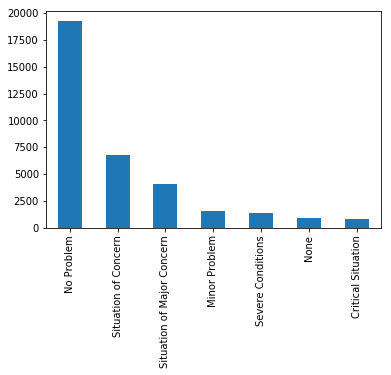

In [23]:
severity_counts.plot(kind='bar')

In [44]:
sev_conditions = df[df['severity'] == 'Severe Conditions']

In [47]:
sev_conditions[:1]

,onedim_j,twodim_j,reliability,severity,demo_groups_j,specific_needs_j,aff_groups_j,geo_j,info_date,excerpt,has_image,lead_text,lead_id,lead_url,event
1,null,"[{""sector"": ""Nutrition"", ""subsectors"": [""Breas...",Usually,Severe Conditions,"[""Infants/toddlers (< 5 years old)""]",null,"[""Affected""]",null,2016-11-15,"112,500 children under five are at risk of acu...",True,None,4,http://reliefweb.int/sites/reliefweb.int/files...,Test Event


In [30]:
df.filter(like='_j').columns

Index(['onedim_j', 'twodim_j', 'demo_groups_j', 'specific_needs_j',
       'aff_groups_j', 'geo_j'],
      dtype='object')

In [8]:
################ NLTK playing around
import nltk
from nltk.corpus import names

In [9]:
labeled_names = [(name, "male") for name in names.words('male.txt')] + [(name, "female") for name in names.words('female.txt')]

In [5]:
import random
def train_corpus(corpus, feature_function):
    """Returns a classifier and its accuracy based on the corpus and feature function"""
    # TODO: set option for uniform sampling of all groups or just sample randomly without considering 
    random.shuffle(corpus)
    feature_sets = [(feature_function(n), label) for (n, label) in corpus]
    train_set, test_set = feature_sets[500:], feature_sets[:500]
    classifier = nltk.NaiveBayesClassifier.train(train_set)
    accuracy = nltk.classify.accuracy(classifier, test_set)
    return classifier, accuracy

In [6]:
def gender_feature_1(name):
    return {'first': name[0], 'last':name[-1]}
def gender_feature_2(name):
    return {'last':name[-1]}

In [10]:
# Get classifiers
classifier1, accuracy1 = train_corpus(labeled_names, gender_feature_1)
classifier2, accuracy2 = train_corpus(labeled_names, gender_feature_2)
# Get features for carol
carol_f1 = gender_feature_1('carol')
carol_f2 = gender_feature_2('carol')

In [30]:
def get_classification_probs(classifier, features):
    """Returns list of tuples containing labelname and probability"""
    dist = classifier.prob_classify(features)
    return [(label, dist.prob(label)) for label in dist.samples()]

In [35]:
print(get_classification_probs(classifier2, carol_f2))
print(get_classification_probs(classifier1, carol_f1))

[('female', 0.47841239233277494), ('male', 0.5215876076672253)]
[('female', 0.36440393622717915), ('male', 0.635596063772822)]


In [12]:
import pickle
f= open('classifier.object', 'wb')
pickle.dump(classifier1, f)
f.close()

In [13]:
c =nltk.NaiveBayesClassifier()
c.classify('bibek')

TypeError: __init__() missing 2 required positional arguments: 'label_probdist' and 'feature_probdist'